In [1]:
import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 120
sns.set_theme()
os.makedirs("docs/eda", exist_ok=True)


In [4]:
CSV_PATH = "../data/01_raw/credit_risk_dataset.csv"
df = pd.read_csv(CSV_PATH)
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
display(df.shape)
display(df.info())
display(df.describe(include="all").T.head(20))


(32581, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_age,32581.0,NaN,NaN,NaN,27.7346,6.348078,20.0,23.0,26.0,30.0,144.0
person_income,32581.0,NaN,NaN,NaN,66074.84847,61983.119168,4000.0,38500.0,55000.0,79200.0,6000000.0
person_home_ownership,32581,4,RENT,16446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_emp_length,31686.0,NaN,NaN,NaN,4.789686,4.14263,0.0,2.0,4.0,7.0,123.0
loan_intent,32581,6,EDUCATION,6453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_grade,32581,7,A,10777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,32581.0,NaN,NaN,NaN,9589.371106,6322.086646,500.0,5000.0,8000.0,12200.0,35000.0
loan_int_rate,29465.0,NaN,NaN,NaN,11.011695,3.240459,5.42,7.9,10.99,13.47,23.22
loan_status,32581.0,NaN,NaN,NaN,0.218164,0.413006,0.0,0.0,0.0,0.0,1.0
loan_percent_income,32581.0,NaN,NaN,NaN,0.170203,0.106782,0.0,0.09,0.15,0.23,0.83


In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
num_cols, cat_cols[:10]


(['person_age',
  'person_income',
  'person_emp_length',
  'loan_amnt',
  'loan_int_rate',
  'loan_status',
  'loan_percent_income',
  'cb_person_cred_hist_length'],
 ['person_home_ownership',
  'loan_intent',
  'loan_grade',
  'cb_person_default_on_file'])

loan_int_rate        3116
person_emp_length     895
dtype: int64

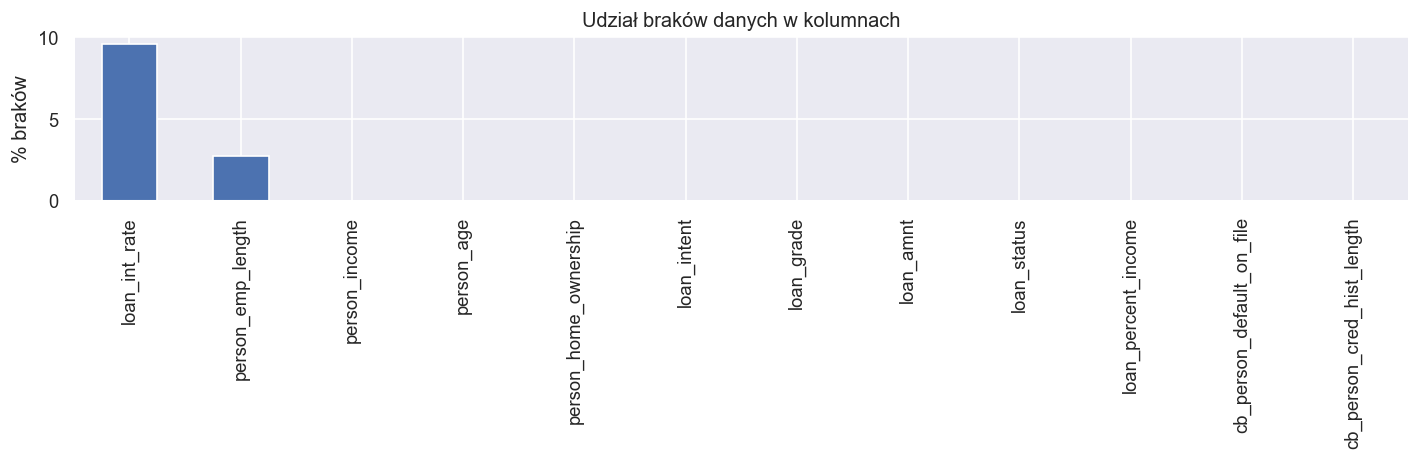

In [7]:
na = df.isna().sum().sort_values(ascending=False)
display(na[na>0])

ax = (df.isna().mean().sort_values(ascending=False)*100).plot.bar(figsize=(12,4))
plt.ylabel("% braków")
plt.title("Udział braków danych w kolumnach")
plt.tight_layout()
plt.savefig("docs/eda/missingness.png")
plt.show()


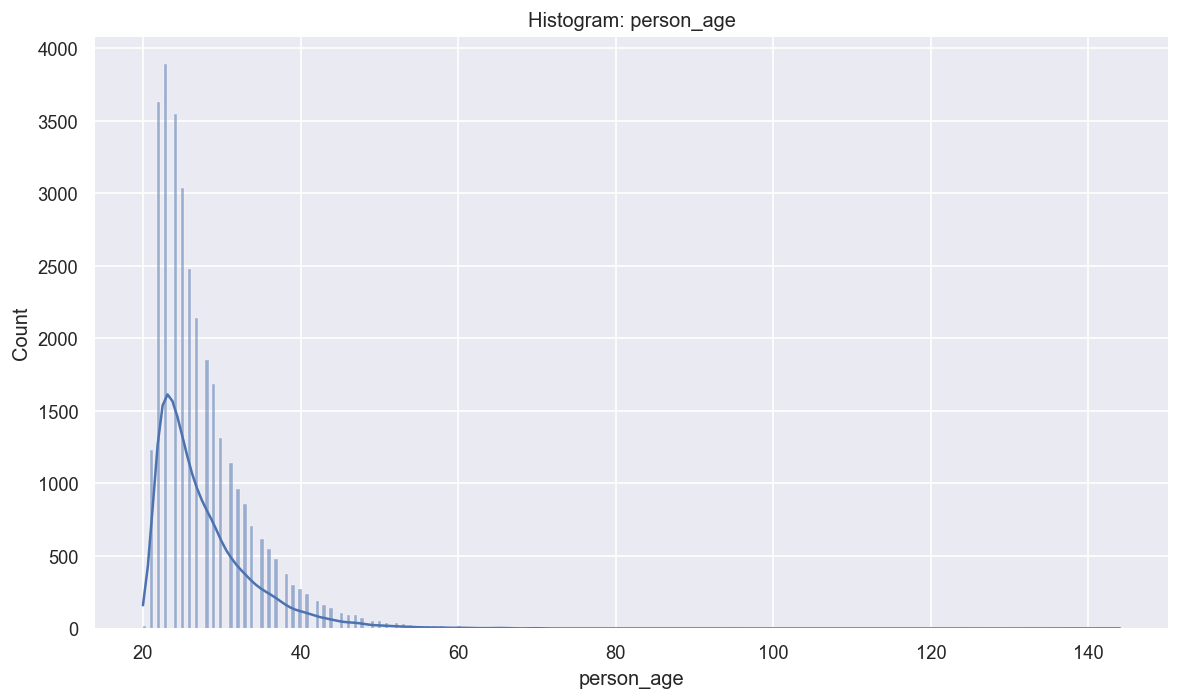

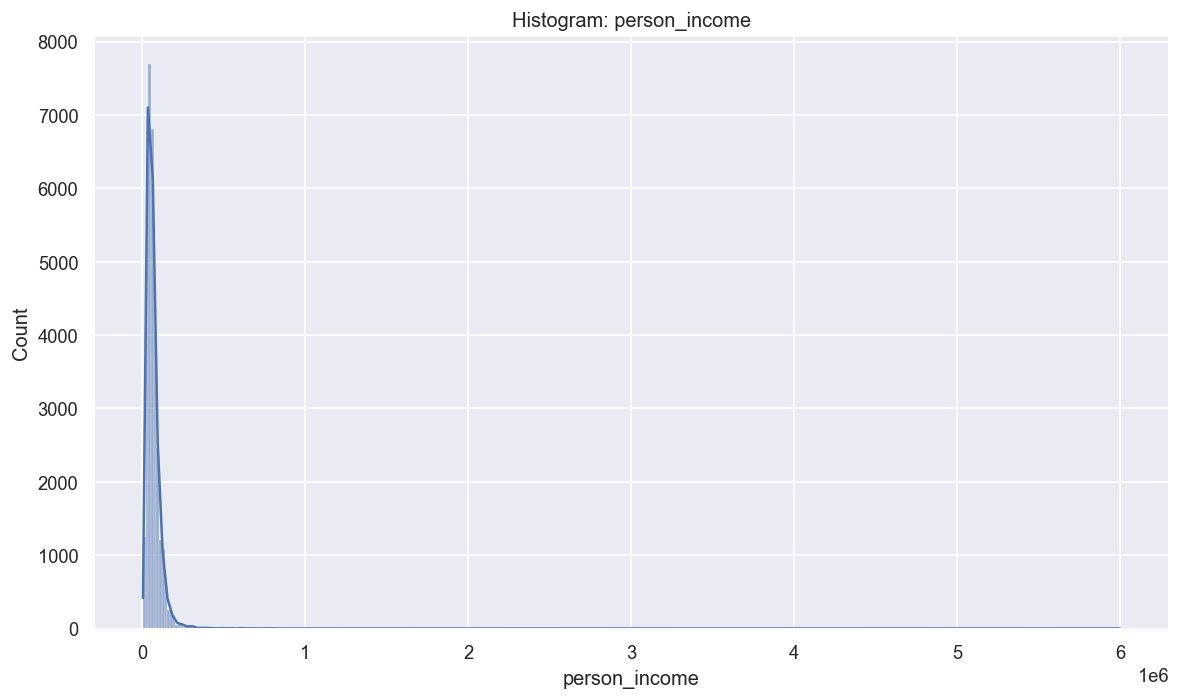

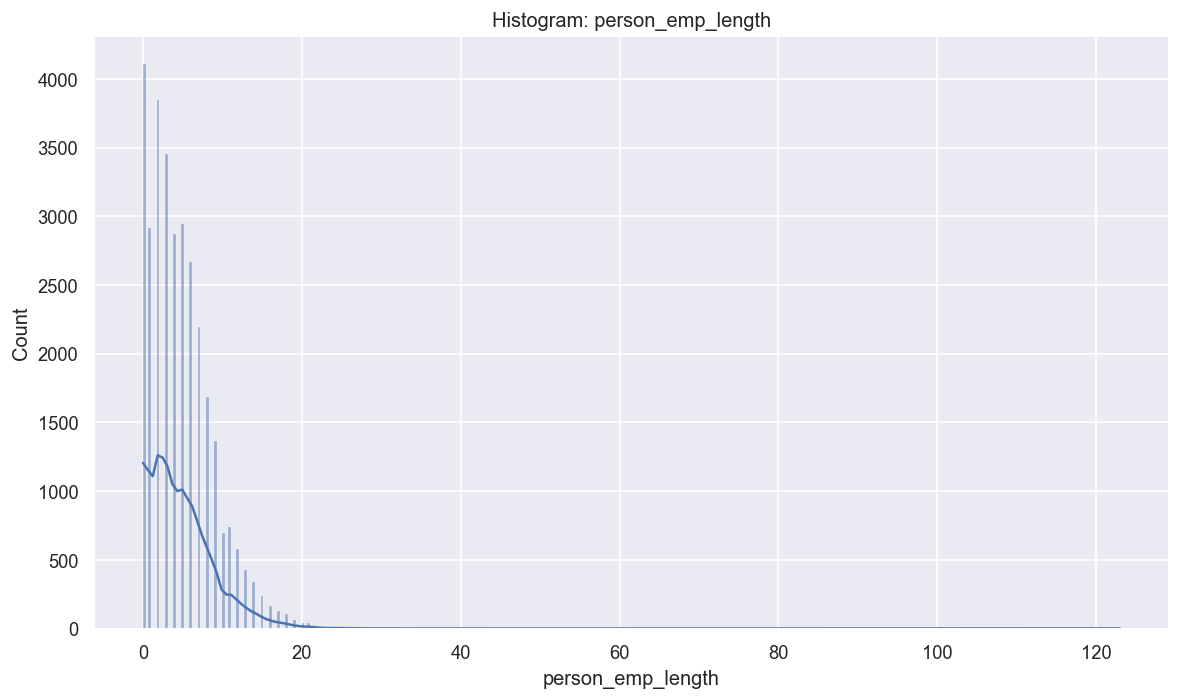

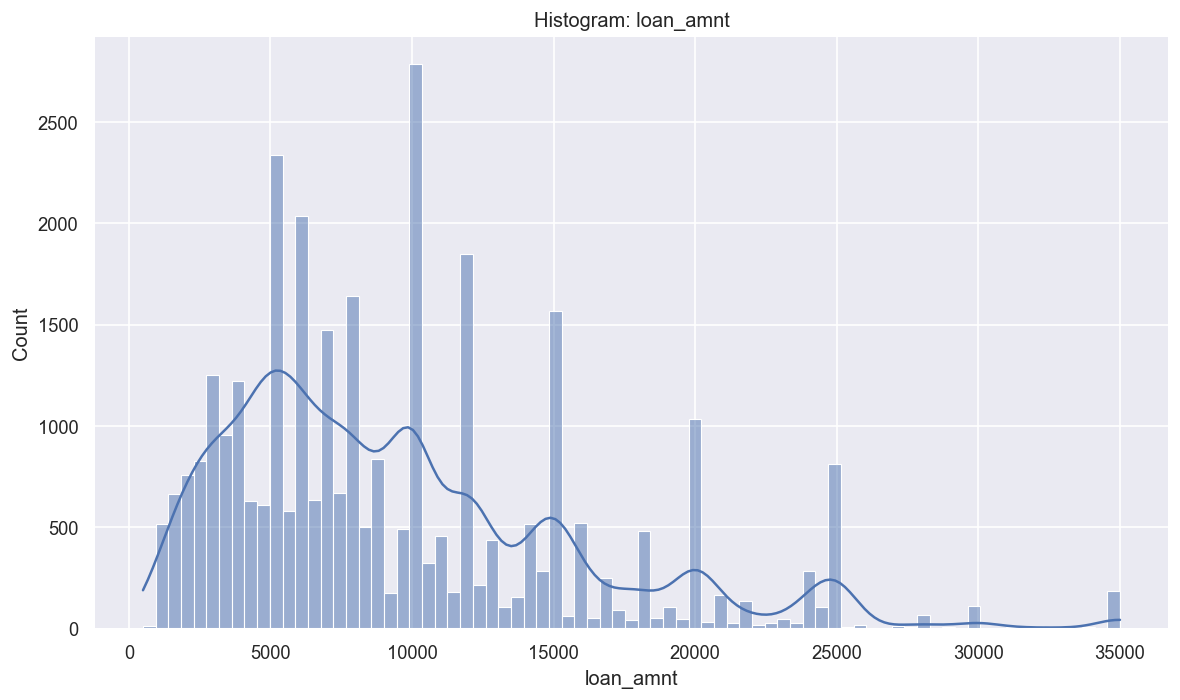

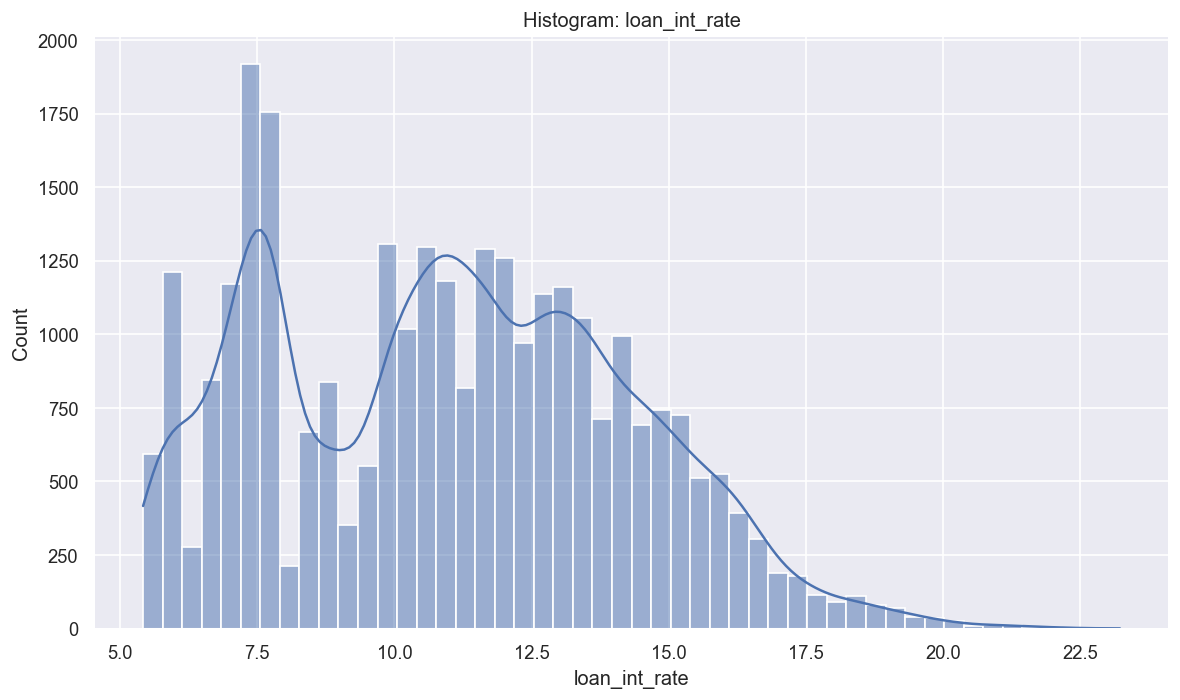

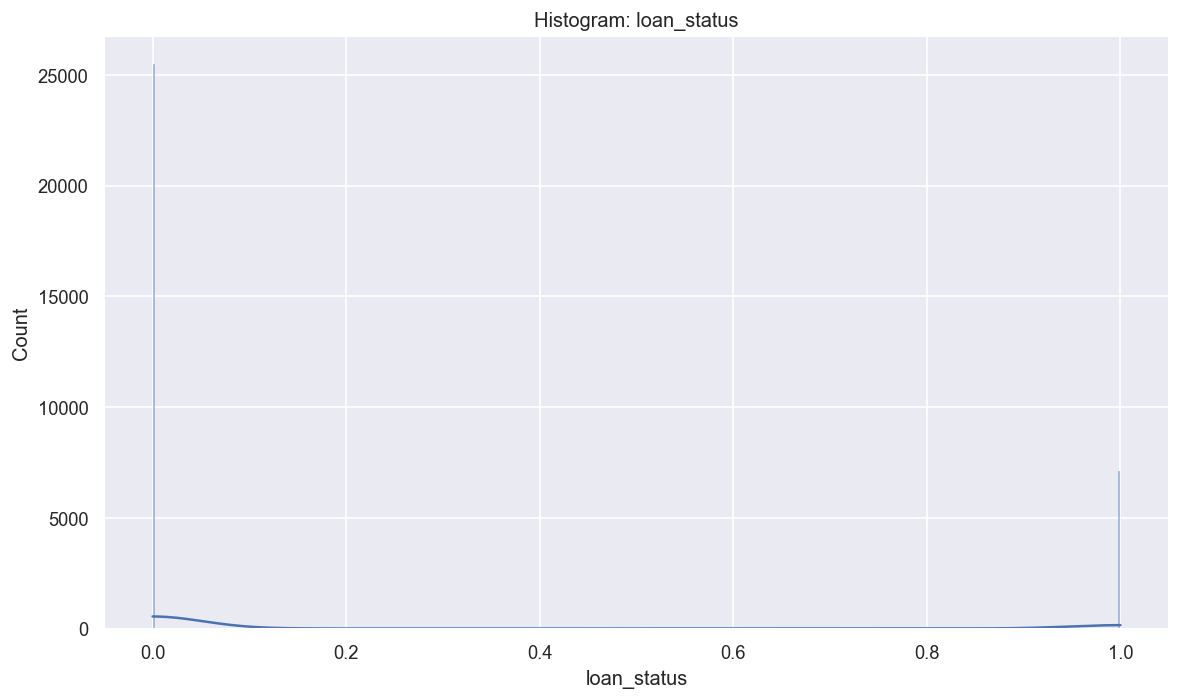

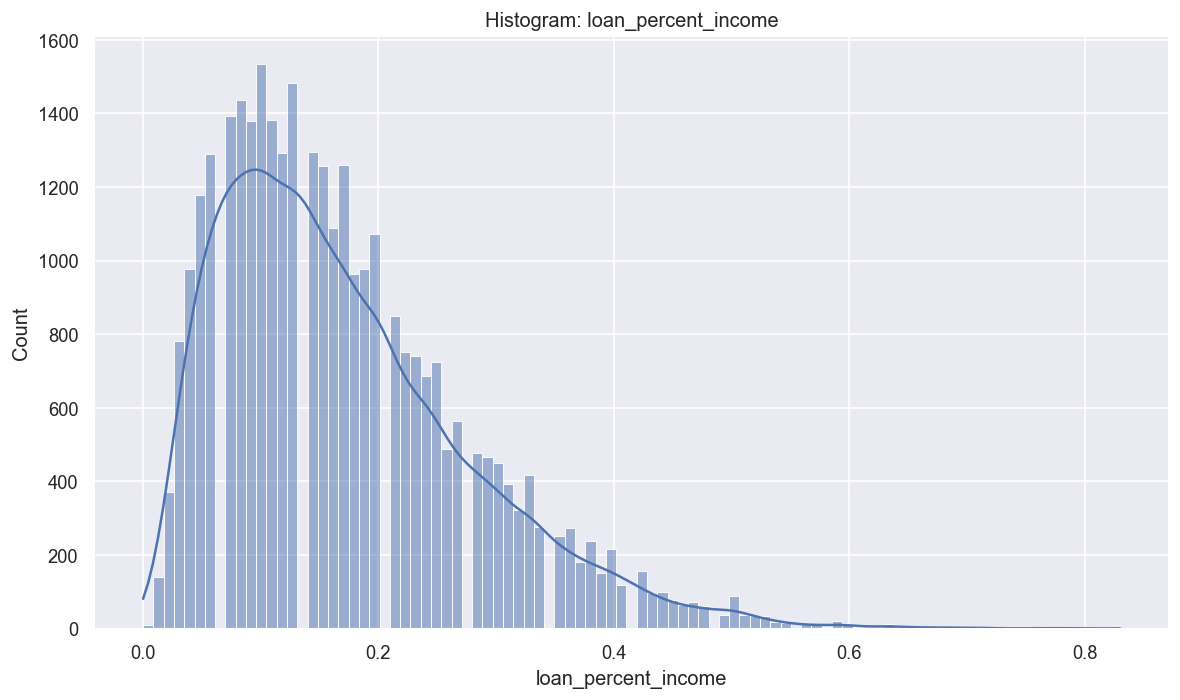

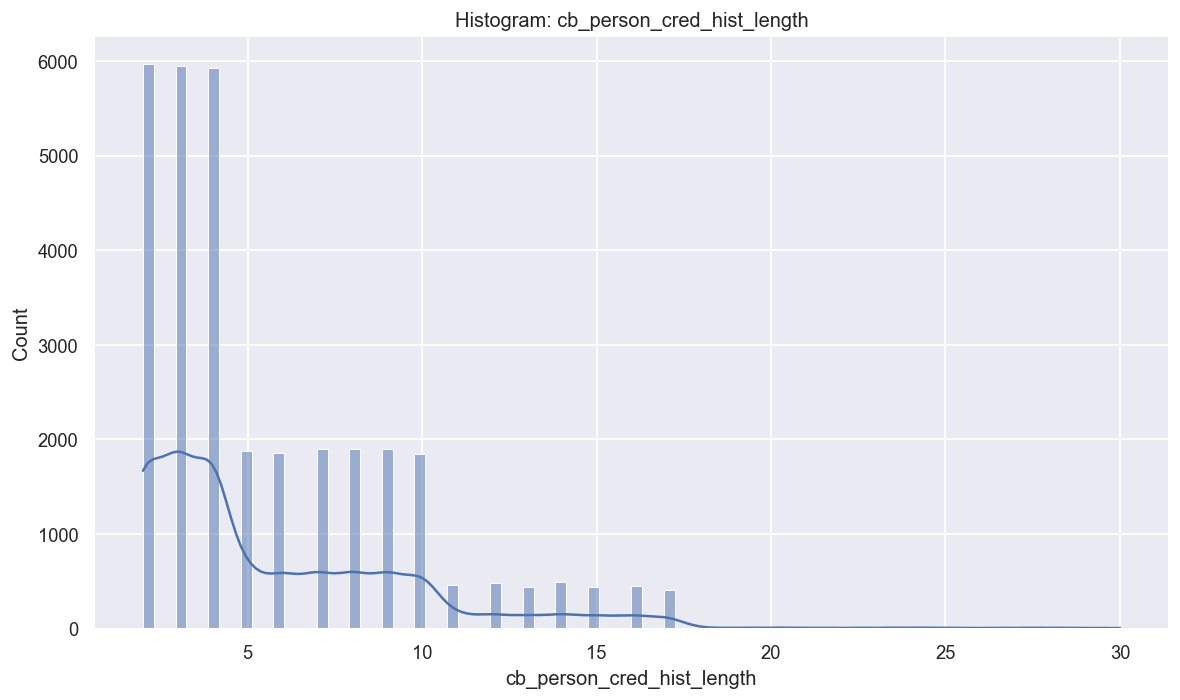

In [10]:
for col in num_cols[:24]:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Histogram: {col}")
    plt.tight_layout()
    plt.show()



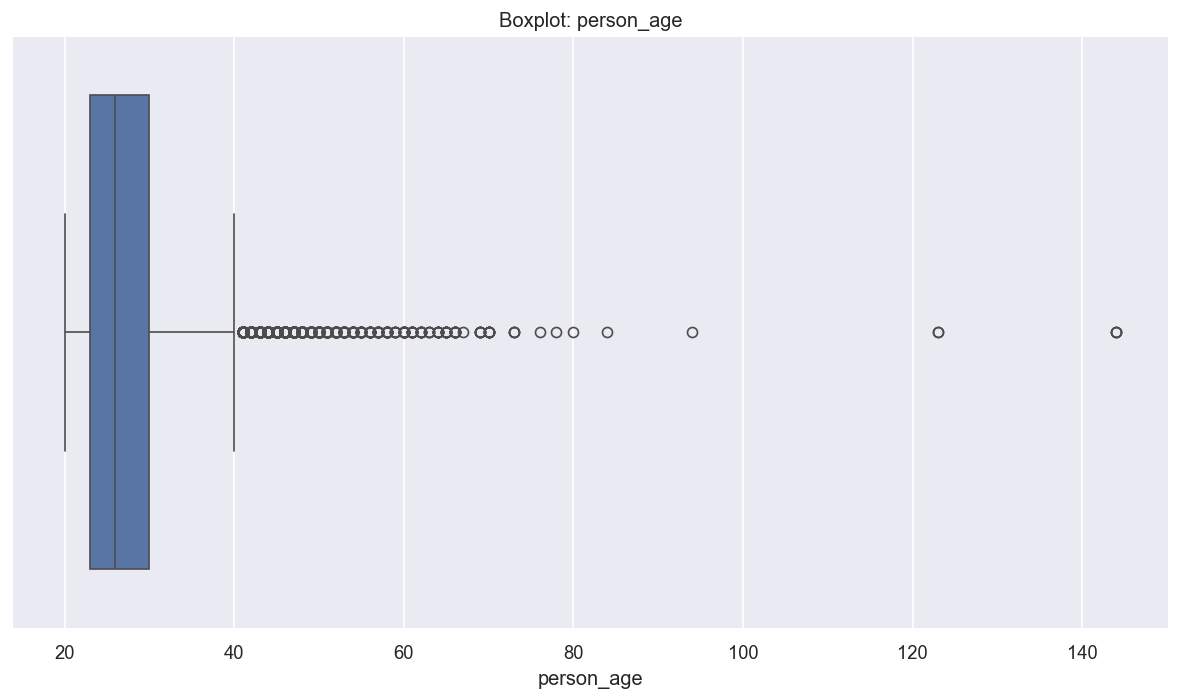

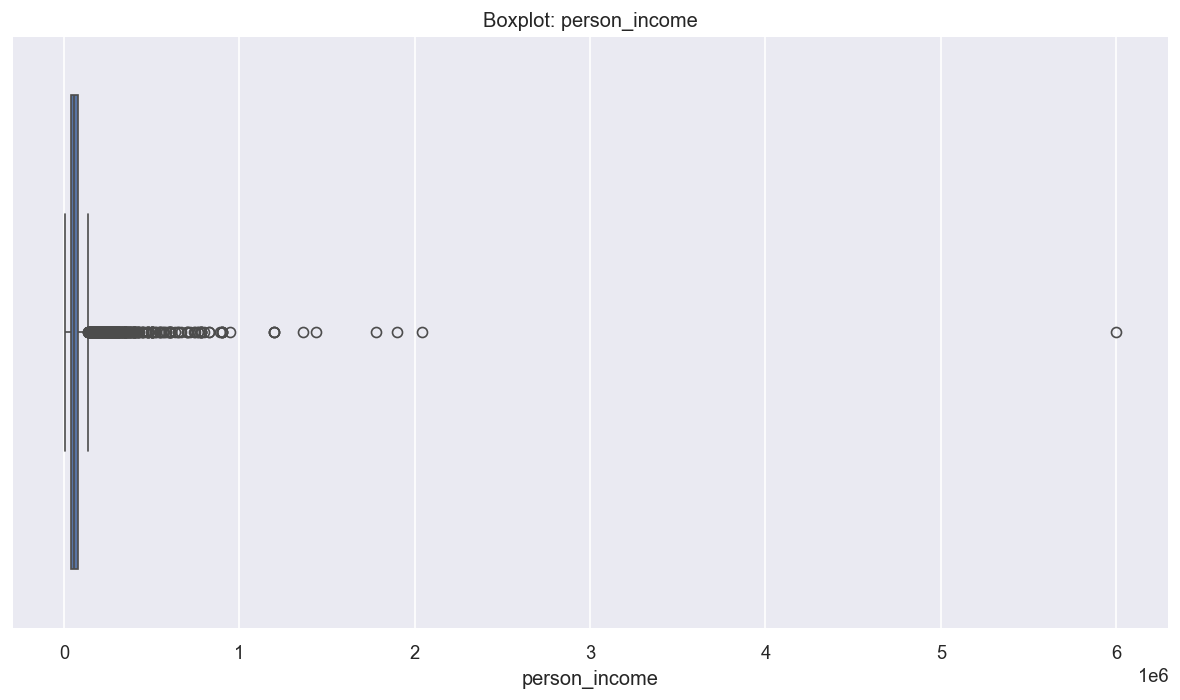

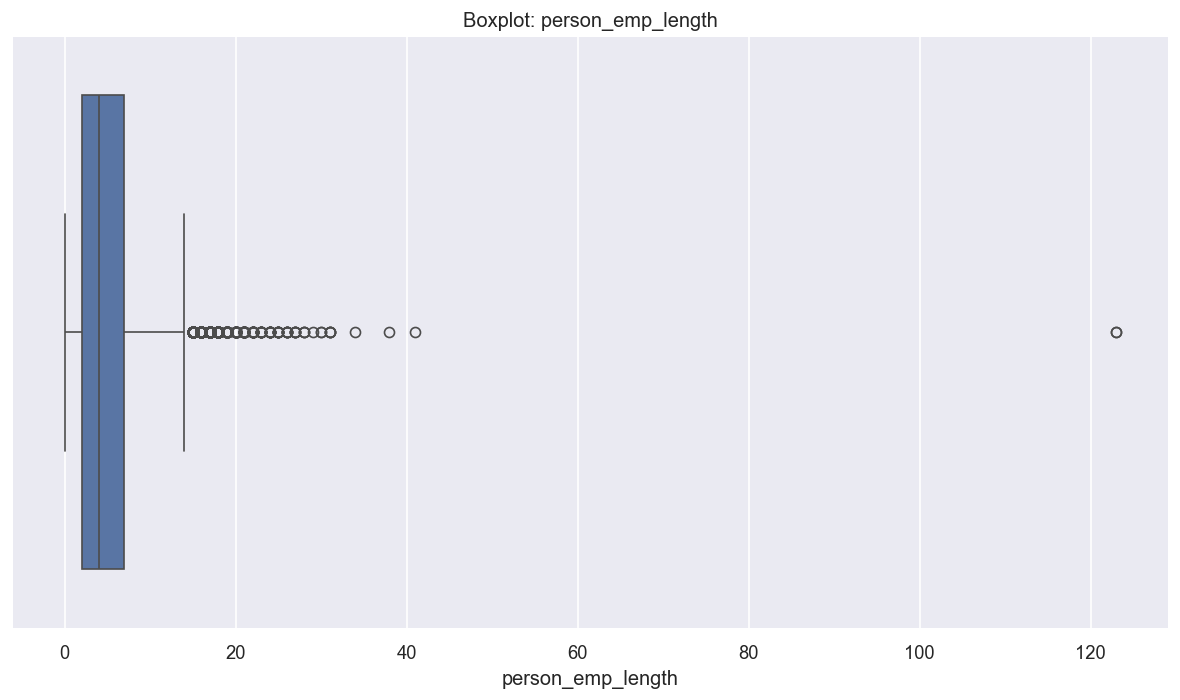

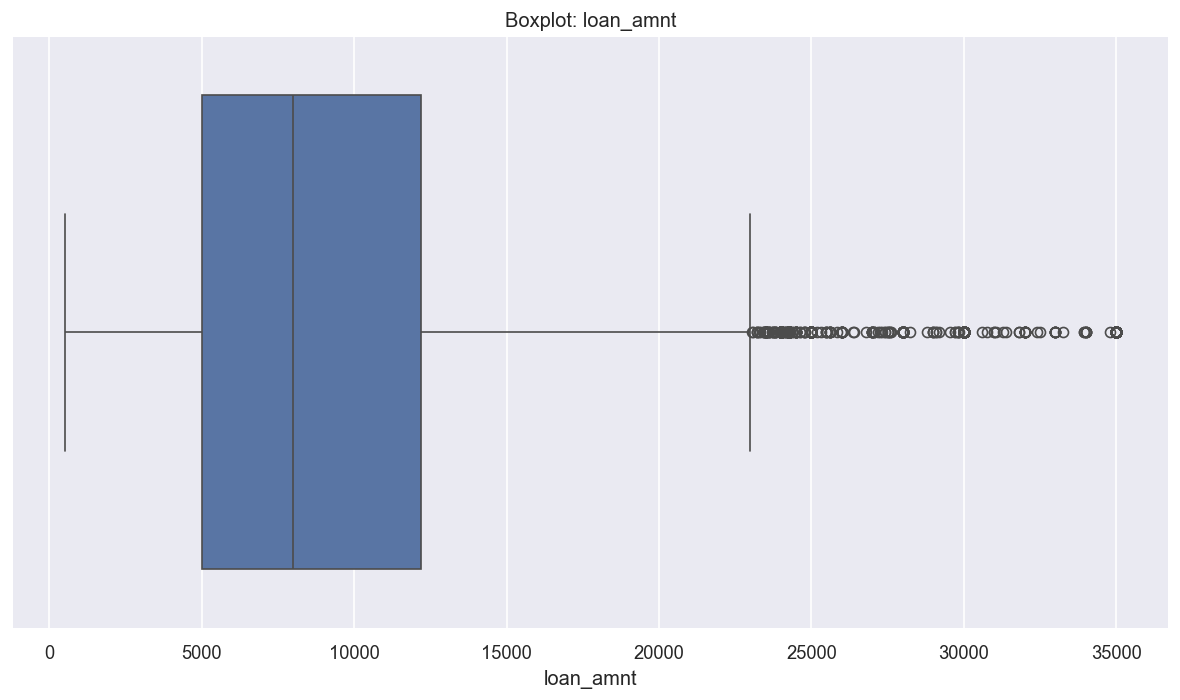

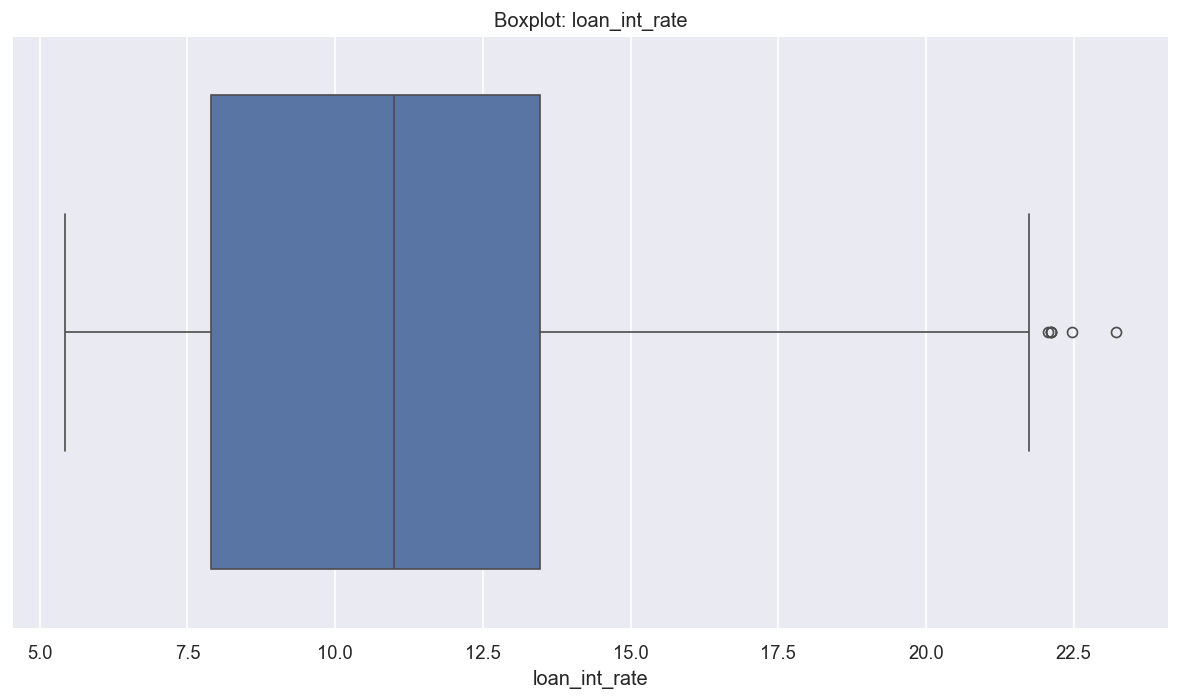

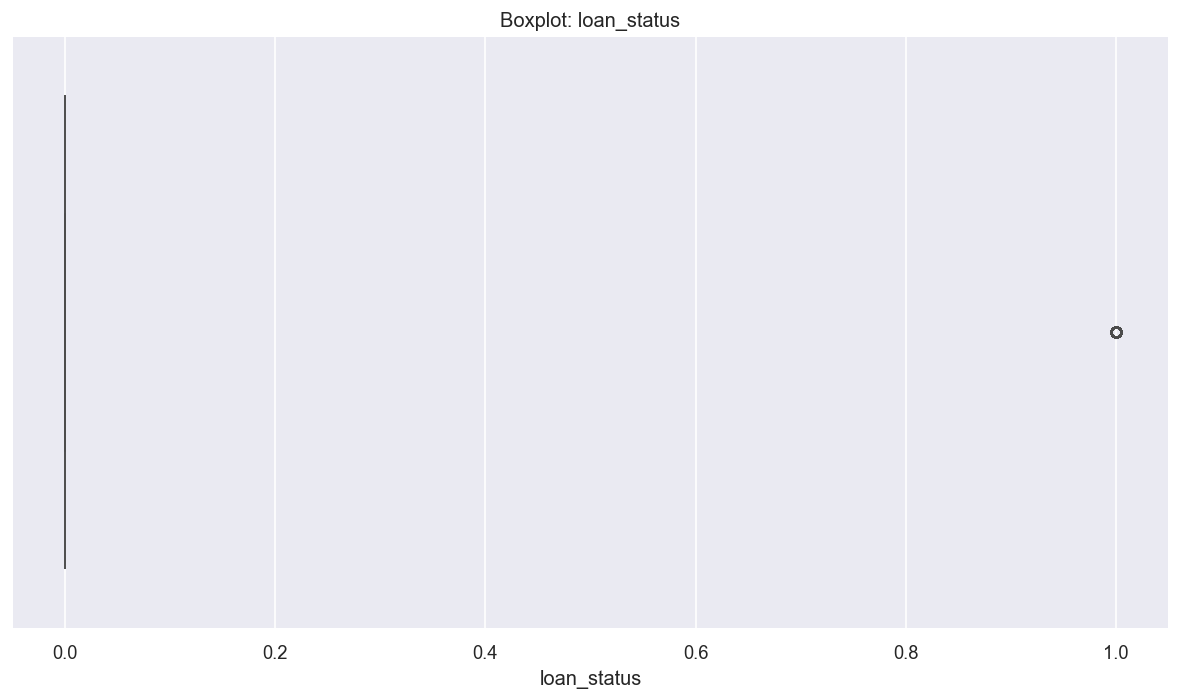

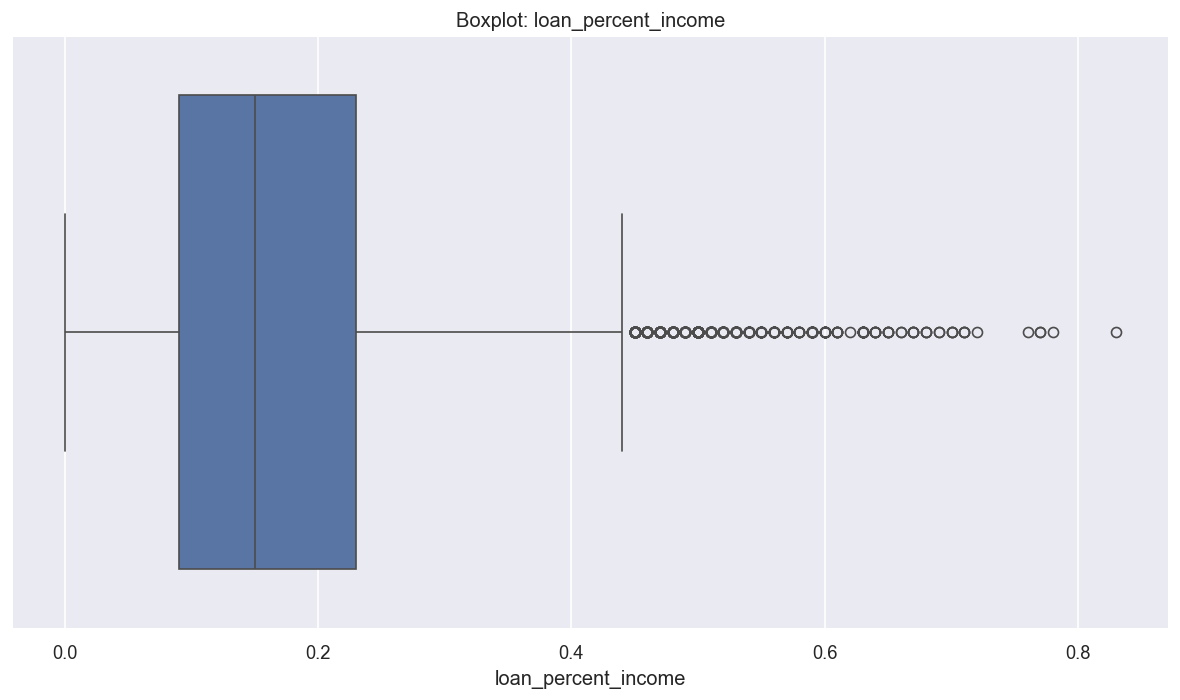

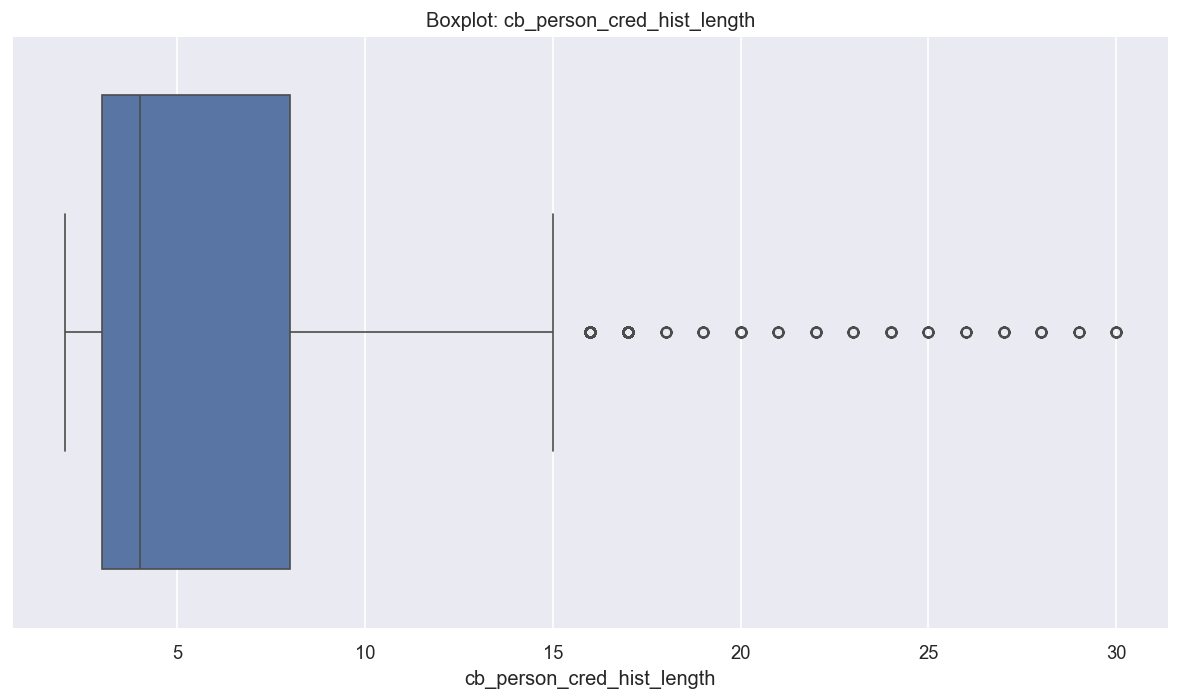

In [11]:
for col in num_cols[:12]:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()


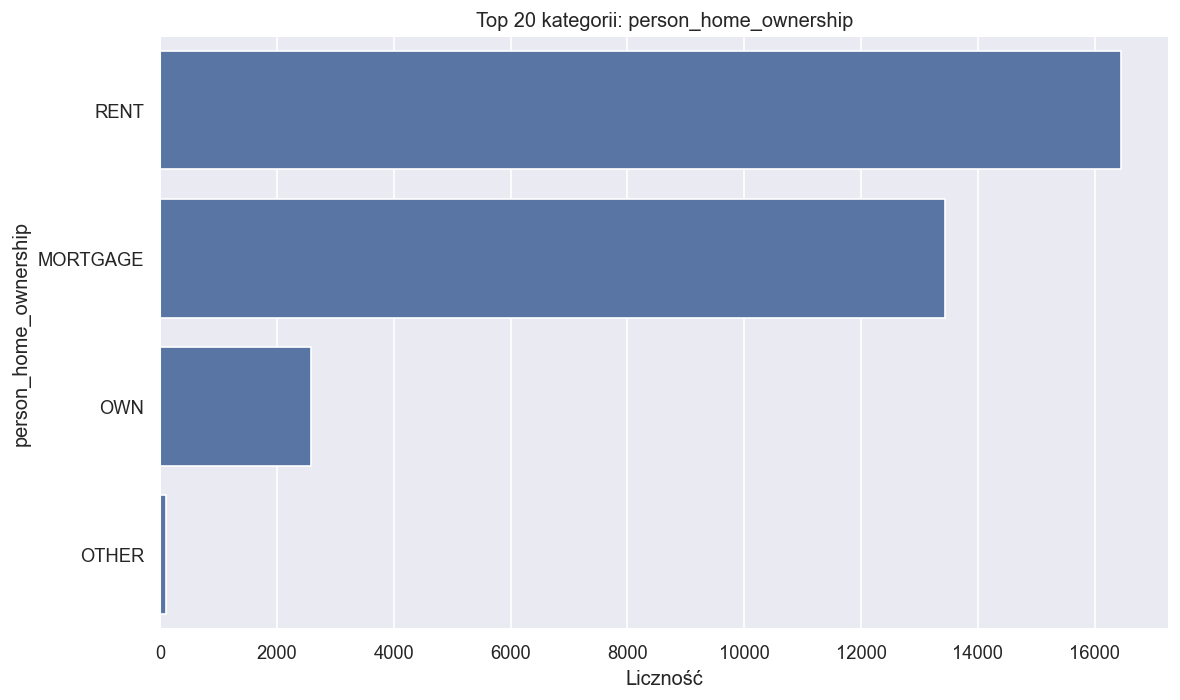

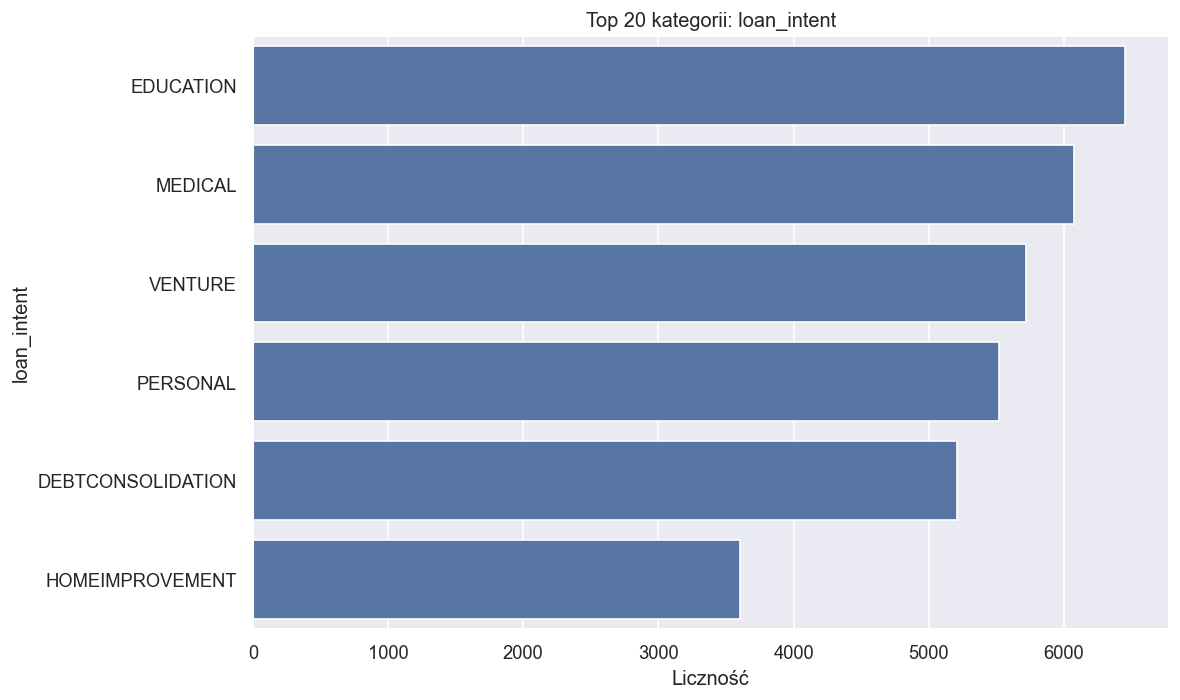

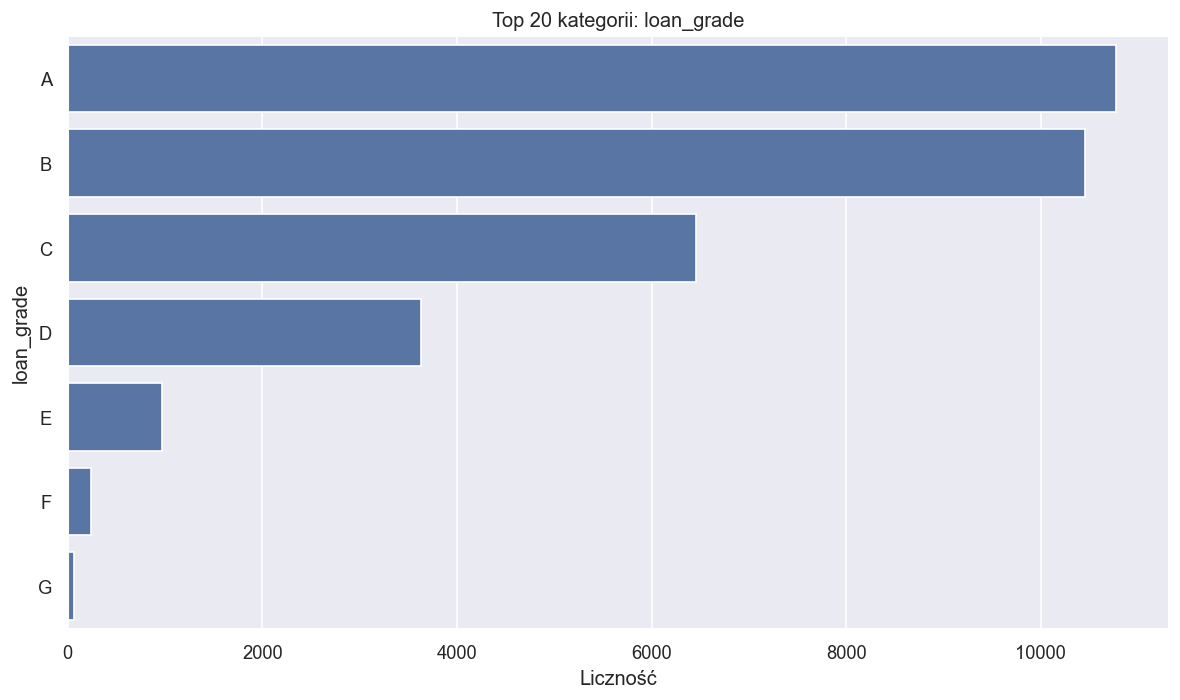

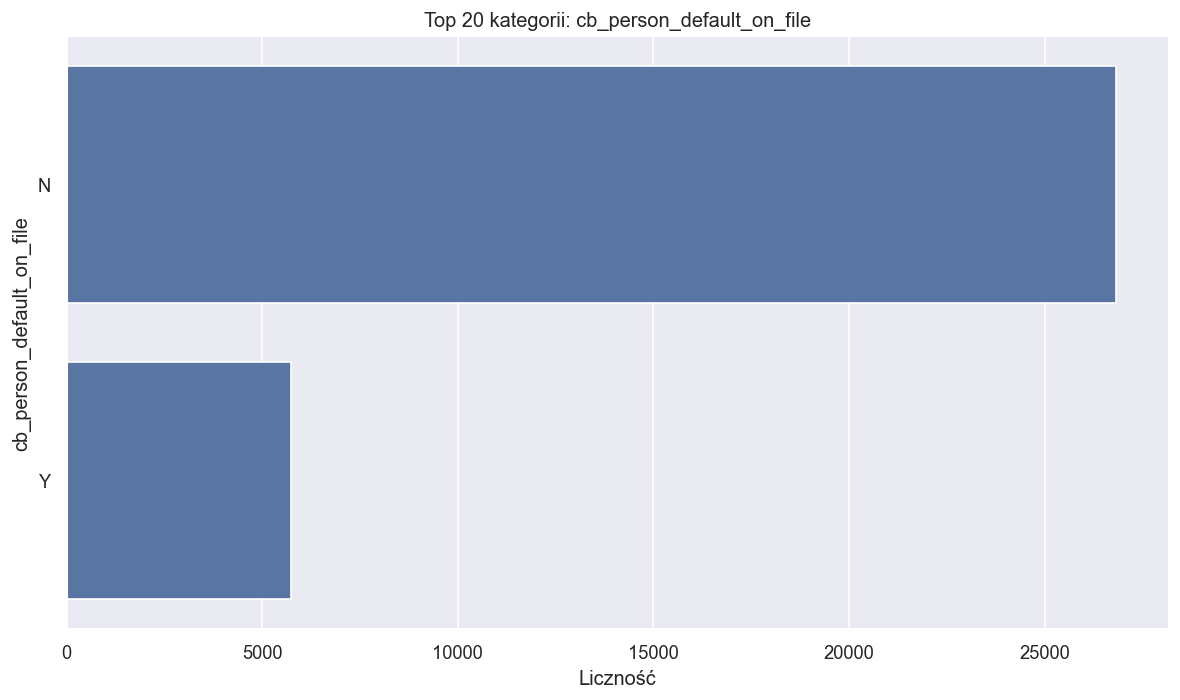

In [12]:
for col in cat_cols[:12]:
    vc = df[col].astype("string").fillna("<NA>").value_counts().head(20)
    sns.barplot(x=vc.values, y=vc.index)
    plt.title(f"Top 20 kategorii: {col}")
    plt.xlabel("Liczność")
    plt.tight_layout()
    plt.show()


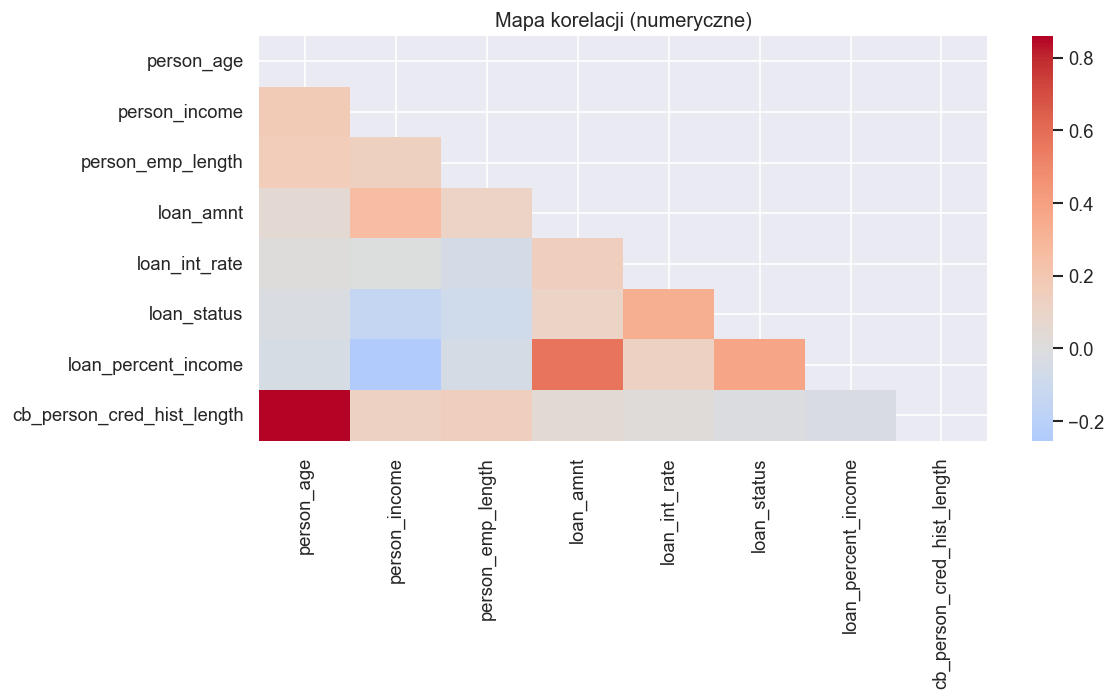

In [13]:
if len(num_cols) > 0:
    corr = df[num_cols].corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0)
    plt.title("Mapa korelacji (numeryczne)")
    plt.tight_layout()
    plt.savefig("docs/eda/correlation_heatmap.png")
    plt.show()
